In [11]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import copy
import math
from PIL import Image
print(torch.__version__)
plt.ion()   # interactive mode

1.2.0


In [12]:
torch.manual_seed(0)
CHECK_POINT_PATH = 'best_model.pkl'
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [13]:

def apply_test_transforms(inp):
    out = transforms.functional.resize(inp, [224,224])
#     print(np.shape(out))
    out = transforms.functional.to_tensor(out)
#     print(np.shape(out))
    out = transforms.functional.normalize(out, [0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    out = out.to(device)
    return out

In [14]:
def restore_net():
    # restore entire net1 to net2
    net = torch.load('best_model.pkl')
    return net

In [15]:
def predict(path):
    print("path:",path)
    im = Image.open(path)
    im = im.convert('RGB')
    print('img shape is ' + str(np.array(im).shape))
    plt.imshow(im)

    im_as_tensor = apply_test_transforms(im)
    print(im_as_tensor.size())
    minibatch = torch.stack([im_as_tensor])
    print(minibatch.size())
    net(minibatch)

    softMax = nn.Softmax(dim = 1)
    preds = softMax(net(minibatch))
    print()
    preds = list([preds[0,0].item(),preds[0,1].item()])

    predict_proba = max(preds)
    predict_label = "moire" if preds.index(predict_proba)==0 else "normal"

    print("label:",predict_label)
    print("proba:",predict_proba)
    
    return predict_label,predict_proba

In [16]:
net = restore_net()

path: 7752.jpg
img shape is (1280, 720, 3)
torch.Size([3, 224, 224])
torch.Size([1, 3, 224, 224])

label: moire
proba: 0.8616625666618347


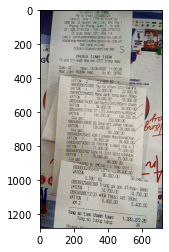

In [17]:
_,_ = predict("7752.jpg")

In [ ]:
# predict